In [1]:
import sys

# sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import Fidelity_Measure as fm

[0.98085206 0.98242281 0.98180013 0.97928308 0.97681559 0.97175153
 0.96628536 0.95830858 0.95106779 0.94062149]


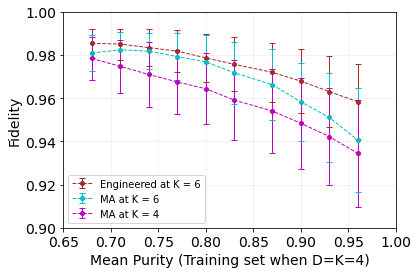

In [3]:

alpha_values = [0.3394171312620001, 0.2705449785972622, 0.21608403853613972, 0.1719394931280026, 0.1354336451610262,
                0.10474169392863078, 0.07857720209126443, 0.05600719445336542, 0.03633856396249098,
                0.019045639592589945]
purity = [0.676083157057054, 0.7076495659010082, 0.7392159747449624, 0.7707823835889166, 0.8023487924328707,
          0.833915201276825, 0.8654816101207792, 0.8970480189647333, 0.9286144278086874, 0.9601808366526416]
alpha_values_filtered = [str(i) + '_k_params_6_filtered' for i in alpha_values]
alpha_values_no_truncation = [str(i) + '_k_params_6_no_truncation' for i in alpha_values]
alpha_values_4_no_truncation = [str(i) + '_k_params_4_no_truncation' for i in alpha_values]
fd_m_list = []
fd_std_list = []
for alpha in alpha_values_filtered:
    # fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}.pickle')
    fd_list, fd_av, data_dms, params_list = pd.read_pickle(
        f'../test_prediction_results_data_driven/RUN_2_fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
    fd_std = np.array(fd_list).std()
    fd_av = np.array(fd_av)
    fd_m_list.append(fd_av)
    fd_std_list.append(fd_std)
# print (np.array(fd_m_list).flatten())
# print (fd_std_list)
fd_m_list_2 = []
fd_std_list_2 = []
for alpha in alpha_values_no_truncation:
    # fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}.pickle')
    fd_list, fd_av, data_dms, params_list = pd.read_pickle(
        f'../test_prediction_results_data_driven/RUN_2_fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
    fd_std = np.array(fd_list).std(axis=1)
    fd_av = np.array(fd_av)
    fd_m_list_2.append(fd_av)
    fd_std_list_2.append(fd_std)

fd_m_list_3 = []
fd_std_list_3 = []
for alpha in alpha_values_4_no_truncation:
    # fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}.pickle')
    fd_list, fd_av, data_dms, params_list = pd.read_pickle(
        f'../test_prediction_results_data_driven/RUN_2_fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
    fd_std = np.array(fd_list).std(axis=1)
    fd_av = np.array(fd_av)
    fd_m_list_3.append(fd_av)
    fd_std_list_3.append(fd_std)

fd_m_array = np.array(fd_m_list).flatten()
fd_std_array = np.array(fd_std_list)

fd_m_array_2 = np.array(fd_m_list_2).flatten()
fd_std_array_2 = np.array(fd_std_list_2).flatten()
print(fd_m_array_2)

fd_m_array_3 = np.array(fd_m_list_3).flatten()
fd_std_array_3 = np.array(fd_std_list_3).flatten()

params_alpha = np.round(np.array(alpha_values), 2)
params_purity = np.round(np.array(purity), 2)


plt.errorbar(params_purity, fd_m_array, yerr=fd_std_array, xerr=None, fmt='--o', color='brown', ecolor='brown',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='Engineered at K = 6')

plt.errorbar(params_purity, fd_m_array_2, yerr=fd_std_array_2, xerr=None, fmt='--co', ecolor='c',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='MA at K = 6')

plt.errorbar(params_purity, fd_m_array_3, yerr=fd_std_array_3, xerr=None, fmt='--mo', ecolor='m',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='MA at K = 4')

# print('Max HS', np.max(fm_av))
# print('std HS', fm_std[np.argmax(fm_av)])

fs = 14  # zoomed 120.0170.010
# fs = 12

plt.xlabel(r'Mean Purity (Training set when D=K=4)', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)

# plt.xscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
## Not Zoomed
plt.axis([0.65, 1e0, 0.9, 1.0])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.grid(alpha=0.2)
plt.legend()
# plt.savefig('fid_vs_ma_purity.png', dpi=600)
# plt.savefig('fid_vs_ma_purity.svg', dpi=600)
# plt.savefig('fid_vs_params_version_5_logx.svg', dpi=600)
# plt.savefig('fid_vs_params_version_5.svg', dpi=600)

# ## Zoomed
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
# plt.axis([1e6, 1e7, 0.96, .99])
# plt.subplots_adjust(bottom=0.6, left=0.6)
# plt.savefig('RUN_2_Zoom.png', dpi=600)

plt.show()
